<a href="https://colab.research.google.com/github/Rohit-Singh12/KaggleCompetitions/blob/main/Rain_Fall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
train_data = pd.read_csv('train.csv')

In [206]:
train_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [207]:
train_data.isna().sum()

,0
id,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0


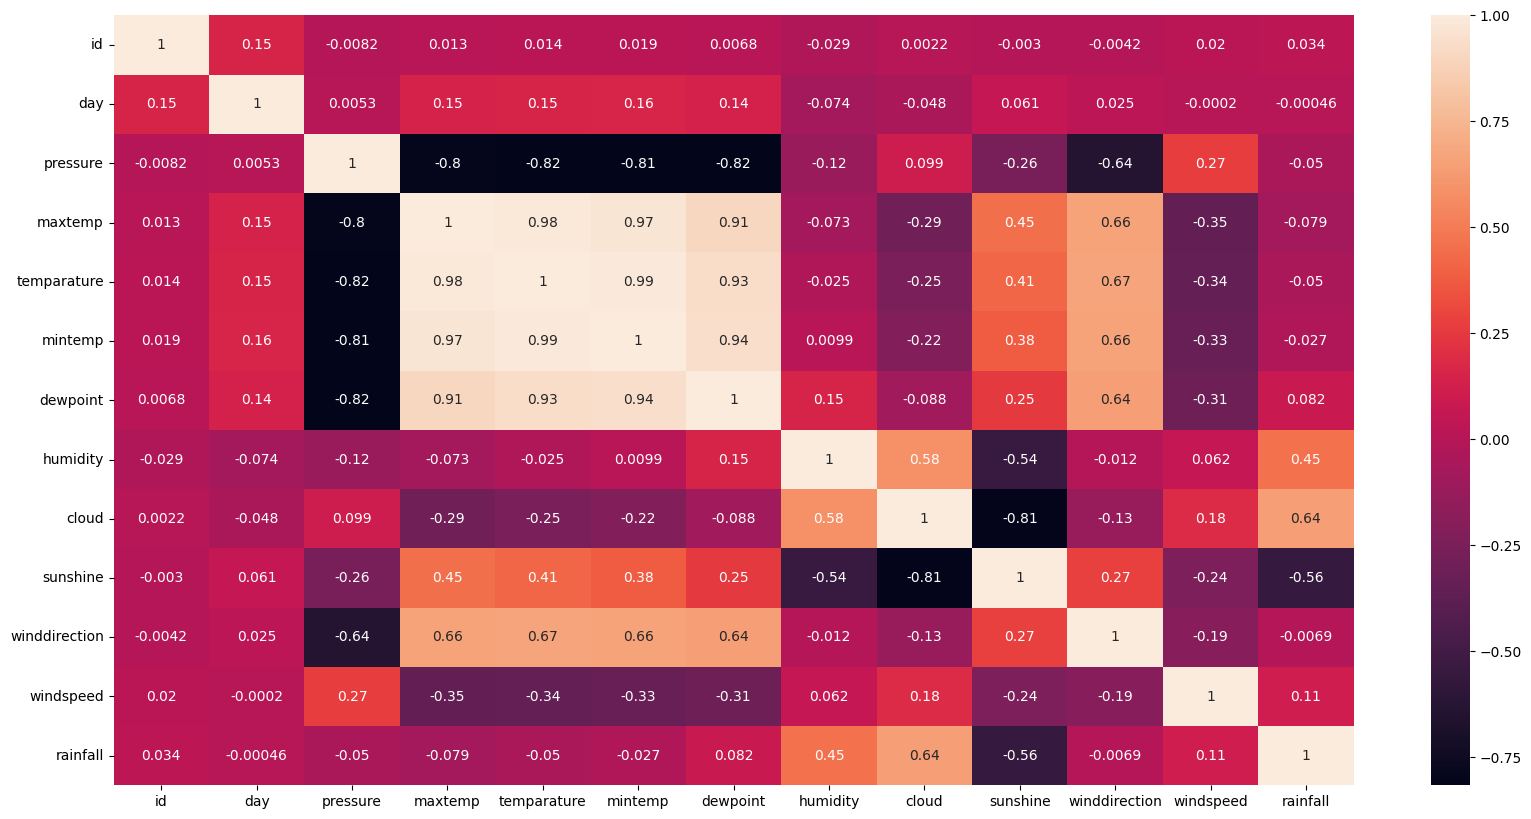

In [208]:
corr = train_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

### Using VIF(Variance Inflation Factor) to remove highly correlated features

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [210]:
train_X = train_data.drop(columns=['rainfall', 'id'])
train_y = train_data['rainfall']

In [211]:
def calculated_vif(train_data):
  vif_data = pd.DataFrame()
  vif_data['Feature'] = train_data.columns
  X = train_data.values
  vif_data['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
  # print(vif_data)
  return vif_data

In [212]:
def remove_collinear_variables(train_data, threshold = 10):
  vif_data = calculated_vif(train_data)
  # print(vif_data)
  max_vif = vif_data['VIF'].max()
  # print(max_vif, type(max_vif))
  while max_vif > threshold:
    # print(vif_data[vif_data['VIF']==max_vif].values)
    column = vif_data[vif_data['VIF']==max_vif].values[0][0]
    # print(train_data.head())
    train_data = train_data.drop(columns=[column])
    vif_data = calculated_vif(train_data)
    max_vif = vif_data['VIF'].max()
    print(max_vif)
  return train_data

In [213]:
train_X = remove_collinear_variables(train_X, 10)

473.4801114429036
262.4279121965798
164.44564918271934
85.89975268433452
26.763214333813885
8.476568470954982


In [214]:
train_X

,day,cloud,sunshine,winddirection,windspeed
0,1,88.0,1.1,60.0,17.2
1,2,91.0,0.0,50.0,21.9
2,3,47.0,8.3,70.0,18.1
3,4,95.0,0.0,60.0,35.6
4,5,45.0,3.6,40.0,24.8
...,...,...,...,...,...
2185,361,88.0,0.1,40.0,22.1
2186,362,88.0,0.0,50.0,35.3
2187,363,79.0,5.0,40.0,32.9
2188,364,93.0,0.1,40.0,18.0


In [215]:
calculated_vif(train_X)

,Feature,VIF
0,day,3.822916
1,cloud,8.476568
2,sunshine,2.237166
3,winddirection,3.070898
4,windspeed,5.812382


In [216]:
#Logisitc Regression for Binary Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [217]:
assert(train_X.shape[0] == train_y.shape[0])

In [218]:
X_train, X_Test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, stratify=train_y)

In [222]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(rainfall
 1    0.753425
 0    0.246575
 Name: proportion, dtype: float64,
 rainfall
 1    0.753425
 0    0.246575
 Name: proportion, dtype: float64)

In [226]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_Test)

In [227]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [228]:
y_pred = model.predict(X_test)

In [230]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [229]:
#accuracy
accuracy_score(y_test, y_pred)

0.8561643835616438

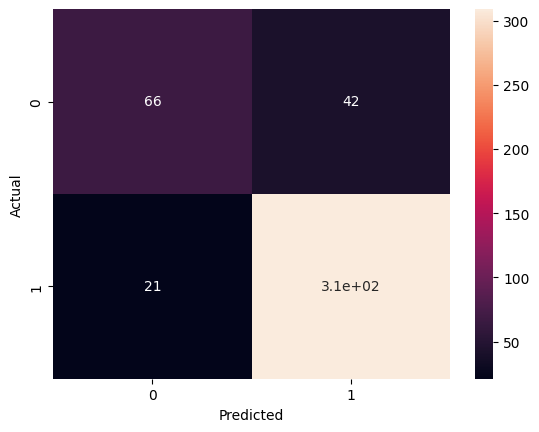

In [231]:
#Confusion metrics
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       108
           1       0.88      0.94      0.91       330

    accuracy                           0.86       438
   macro avg       0.82      0.77      0.79       438
weighted avg       0.85      0.86      0.85       438



In [238]:
#Plotting AUC-ROC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_probs = model.predict_proba(X_test)[:,1]

In [ ]:
y_probs

In [240]:
#ROC-AUC Score
roc_auc_score(y_test, y_probs)

np.float64(0.8841750841750842)

In [243]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

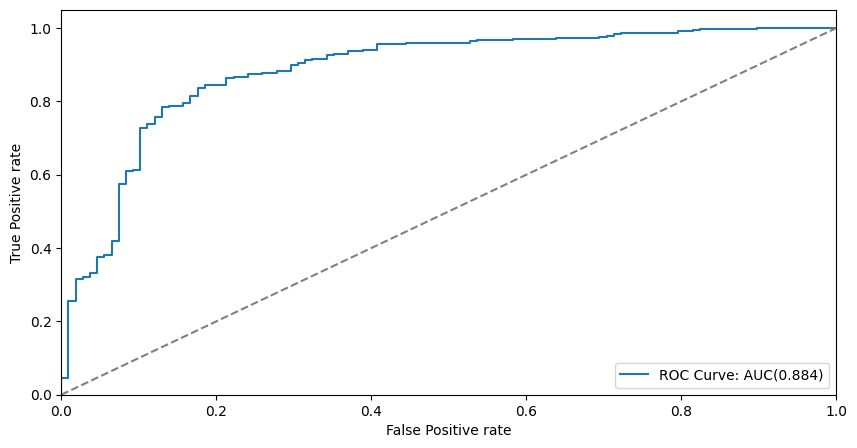

In [247]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr,label=f'ROC Curve: AUC({roc_auc:.3f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [317]:
#Predictions on test data
df_test = pd.read_csv('test.csv')

In [318]:
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [319]:
train_X.columns.values

array(['day', 'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype=object)

In [320]:
df_test = df_test[train_X.columns.values]

In [321]:
df_test.head()

,day,cloud,sunshine,winddirection,windspeed
0,1,99.0,0.0,50.0,24.3
1,2,99.0,0.0,50.0,35.3
2,3,96.0,0.0,40.0,16.9
3,4,45.0,7.1,20.0,50.6
4,5,49.0,9.2,20.0,19.4


In [322]:
df_test.shape

(730, 5)

In [323]:
df_test.isna().sum()

,0
day,0
cloud,0
sunshine,0
winddirection,1
windspeed,0


In [324]:
df_test.head()

,day,cloud,sunshine,winddirection,windspeed
0,1,99.0,0.0,50.0,24.3
1,2,99.0,0.0,50.0,35.3
2,3,96.0,0.0,40.0,16.9
3,4,45.0,7.1,20.0,50.6
4,5,49.0,9.2,20.0,19.4


In [328]:
df_test = df_test.fillna(df_test.mean())

In [329]:
df_test.isna().sum()

,0
day,0
cloud,0
sunshine,0
winddirection,0
windspeed,0


In [330]:
scaler = StandardScaler()
df_test = scaler.fit_transform(df_test)

In [335]:
df_test.shape

(730, 5)

In [333]:
train_data.shape

(2190, 13)

In [334]:
test_probs = model.predict_proba(df_test)[:,1]

In [336]:
df = {
    'id': range(train_data.shape[0],train_data.shape[0]+df_test.shape[0]),
    'rainfall': test_probs
}

In [338]:
df = pd.DataFrame(df)

In [339]:
df.to_csv('rainfall.csv',index=False)